In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv")

In [6]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])

df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0
1,U.S. conservative leader optimistic of common ...,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",1
3,Court Forces Ohio To Allow Millions Of Illega...,0
4,Democrats say Trump agrees to work on immigrat...,1


In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")

df['vector'] = df['Text'].apply(lambda x: nlp(x).vector)

df.head()

,Text,label,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,0,"[0.2852135, 0.1471193, -0.027056089, -0.094379..."
1,U.S. conservative leader optimistic of common ...,1,"[0.21878316, 0.15037002, 0.30523875, -0.098143..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",1,"[0.14520952, 0.11983009, 0.106786065, 0.006130..."
3,Court Forces Ohio To Allow Millions Of Illega...,0,"[0.23895009, 0.055242084, 0.15995139, -0.11305..."
4,Democrats say Trump agrees to work on immigrat...,1,"[0.13075006, 0.095256045, 0.2594149, -0.080544..."


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['vector'], df['label'], test_size=0.2, random_state=2022)

In [10]:
X_train.shape

(7920,)

In [24]:
X_train[0]

array([ 0.2852135 ,  0.1471193 , -0.02705609, -0.09437947, -0.05642827,
        0.0221945 ,  0.07526758,  0.03484899,  0.07428341,  0.03518226,
        0.3127675 , -0.05421721, -0.10398651, -0.07286043, -0.02122273,
        0.09011638,  0.22054735,  0.23160839,  0.10489469, -0.21421401,
       -0.01588784, -0.05994668, -0.09004485, -0.00793837,  0.17989253,
        0.17594083,  0.19578274, -0.10257511, -0.31912258,  0.25358093,
       -0.0102899 ,  0.20881756, -0.20135777, -0.10099719,  0.06635217,
        0.05476799, -0.2343471 , -0.05865194, -0.01055536,  0.10402845,
        0.10402977,  0.39580336,  0.09685836, -0.48125234, -0.02122401,
       -0.1372393 ,  0.22299488,  0.3759266 , -0.14899537,  0.00908168,
        0.07387945, -0.19088016,  0.03890312, -0.01319814, -0.03850031,
        0.02963629,  0.2471497 , -0.10951865, -0.31507802, -0.0390675 ,
       -0.14892536, -0.12008533,  0.10049341, -0.11353339, -0.03416868,
       -0.13489725, -0.14262773, -0.0403205 , -0.19996154, -0.15

In [11]:
X_test.shape

(1980,)

In [12]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [25]:
X_train_2d[0]

array([ 0.1955046 ,  0.07668559,  0.28068647, -0.1175345 , -0.05894431,
        0.06727631, -0.18770958, -0.13498142,  0.05457389,  0.22015022,
        0.42446846, -0.05370476,  0.11473455, -0.15488578, -0.07714989,
       -0.01001564,  0.12860017,  0.10496462, -0.01993942, -0.11662087,
       -0.0482844 , -0.02575577, -0.0672198 ,  0.2174335 ,  0.00751088,
        0.05510356,  0.10621613,  0.1697667 , -0.24312423,  0.3917913 ,
       -0.16622305,  0.22485249, -0.35267457, -0.25747612,  0.29391012,
        0.03468258,  0.06709469, -0.07112443, -0.12173538,  0.19112487,
        0.16232765,  0.3333833 , -0.16426955, -0.40781695, -0.03414454,
       -0.12021457,  0.26742676,  0.43444604, -0.11311888, -0.13083799,
        0.11792213,  0.01189784, -0.09013922, -0.31127304, -0.12360515,
        0.04230084,  0.37226802, -0.19819738, -0.1812001 , -0.08364213,
       -0.278714  , -0.23746397,  0.04281421, -0.1394241 ,  0.09252767,
       -0.3331944 ,  0.10788321,  0.06565544, -0.16924325, -0.22

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train_2d = scaler.fit_transform(X_train_2d)
scaled_test_2d = scaler.fit_transform(X_test_2d)

clf = MultinomialNB()

clf.fit(scaled_train_2d, y_train)


MultinomialNB()

In [14]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1024
           1       0.91      0.96      0.93       956

    accuracy                           0.93      1980
   macro avg       0.93      0.93      0.93      1980
weighted avg       0.94      0.93      0.93      1980



In [15]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric= 'euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1024
           1       0.97      0.99      0.98       956

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Truth')

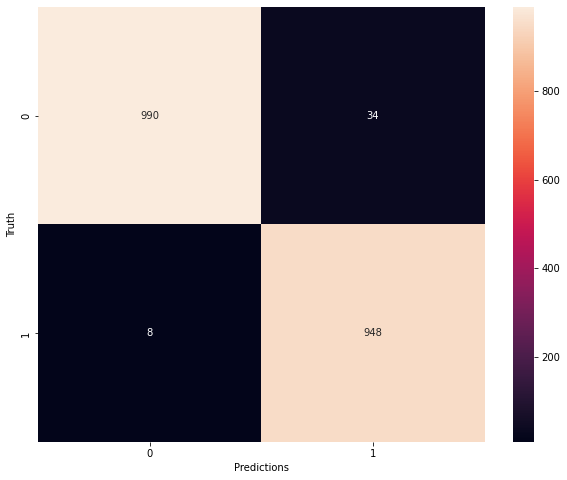

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")